<a href="https://colab.research.google.com/github/AbhinavSri-16/Zomato_Data_Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zomato Data Analysis Project**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Zomato data .csv')
print(dataset)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
def handlerate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataset['rate'] =dataset['rate'].apply(handlerate)
print(dataset.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


**Types of Restaurants**

Text(0.5, 0, 'type of restaurant')

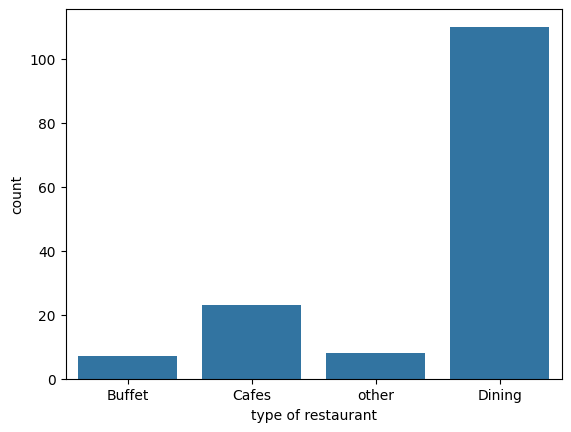

In [ ]:
sns.countplot(x=dataset['listed_in(type)'])
plt.xlabel("type of restaurant")

**The number of votes that the restaurant has received from users.**

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'votes')

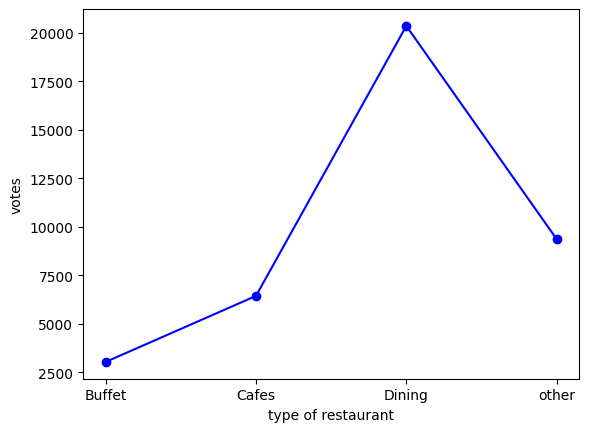

In [ ]:
group_data = dataset.groupby(['listed_in(type)'])['votes'].sum()
result = pd.DataFrame(group_data)
print(result)
plt.plot(result,marker = 'o',c = 'blue')
plt.xlabel("type of restaurant")
plt.ylabel("votes")

**The number of Rating that the restaurant has received from users.**

                     rate
listed_in(type)          
Buffet           3.842857
Cafes            3.765217
Dining           3.571818
other            3.912500


Text(0, 0.5, 'rates')

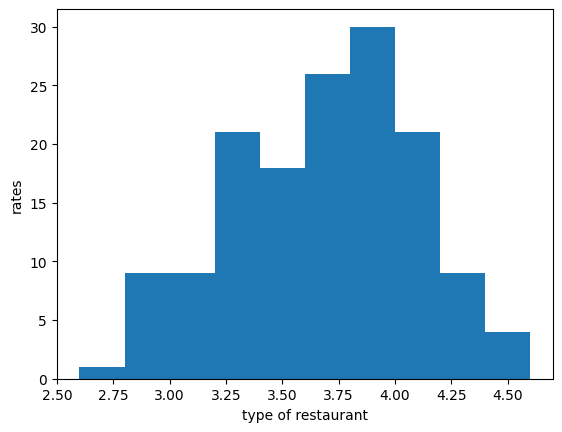

In [ ]:
group_rating= dataset.groupby(['listed_in(type)'])['rate'].mean()
result = pd.DataFrame(group_rating)
print(result)
plt.hist(dataset['rate'])
plt.xlabel("type of restaurant")
plt.ylabel("rates")

In [ ]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


**Most of the couples order food online, average spending analysis**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

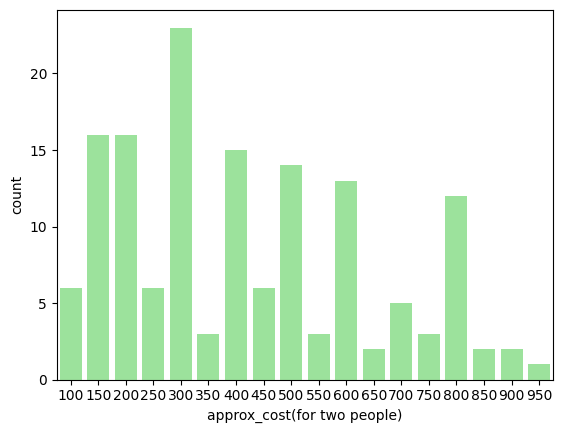

In [ ]:
twopeople_data =dataset['approx_cost(for two people)']
sns.countplot(x=twopeople_data,color='lightgreen')

In [ ]:
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


**Dining and Online food ratings analysis**

<Axes: xlabel='online_order', ylabel='rate'>

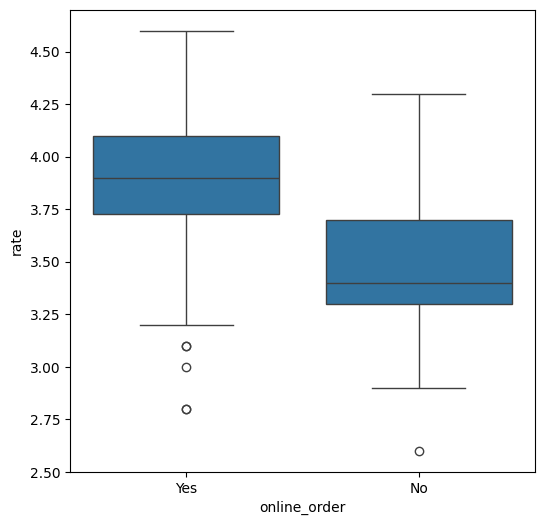

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y= 'rate', data=dataset)

**Most offline orders received by restaurants**

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


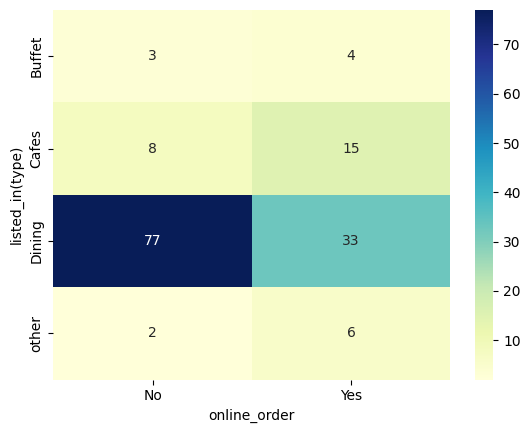

In [ ]:
pivot_table = dataset.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt ='d')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')
plt.show()